# Minimal example with TensorFlow 2.0

### Import the relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### Data generation

In [2]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs, zs))

noise = np.random.uniform(-1,1,(observations,1))

generated_targets = (2*xs) - (3*zs) + 5 + noise

## tensorflow ne fonctionne pas bien avec les fichers classiques tels que Excel, csv. Il faut récupérer les données
# et les mettre dans un fichier.npz(TF_intro)
np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

In [3]:
print(tf.__version__)

2.1.0


### Solving with TensorFlow

In [4]:
training_data = np.load('TF_intro.npz')

In [5]:
input_size = 2
output_size = 1

# sequential est la fonction qui indique que nous définissons le modèle qui prend comme argument différentes
# couches que nous aimerions inclure dans notre algorithme 

#tf.keras.layers.Dense(): prend les entrées fournies au modèle et calcul et calcule le produit scalaire des 
# ==>entrées et des poids et ajoute le biais. Nous devons donc simplement lui passer en paramètre la taille de 
# ==>la sortie (output_size)
# Apllique aussi la fonction d'activation (optionnel)

model = tf.keras.Sequential([ tf.keras.layers.Dense(output_size) ])

Maintenant, conformément à notre cadre théorique, nous avons besoin de:

#### 1. Données
#### 2. Modèle
#### 3. D'une fonction objective 
#### 4. D'un algorithme d'optimisations

In [6]:
# Entraînement, Prend en Arguments différents paramètres, notamment :
#==> L'algorithme d'optimisation( nous amllos utiliser SGD= descente de gradient stochastique)
#==> La fonction de perte (L2-norm= Least sum of squares error)

model.compile(optimizer='sgd', loss='mean_squared_error')

In [7]:
# On donne les données d'Entraînement au modèle. cette fonction prend deux Paramètres obligatoires: iputs et targets
# ==> inputs: les données d'entraînement 
# ==> targets: les cybles 
# ==> epochs: Le nombre d'itérations sur les données d'Entraînement
# ==> verbose: nous permets d'avoir les informations sur l'entraînement du model (=o:pas d'info, =1: dinfo)
 #. pour verbose=2-, nous obtenons des informations plus claires sur le modèle( une ligne par epochs)
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Train on 1000 samples
Epoch 1/100
1000/1000 - 0s - loss: 32.4886
Epoch 2/100
1000/1000 - 0s - loss: 4.3486
Epoch 3/100
1000/1000 - 0s - loss: 1.4724
Epoch 4/100
1000/1000 - 0s - loss: 0.6672
Epoch 5/100
1000/1000 - 0s - loss: 0.4280
Epoch 6/100
1000/1000 - 0s - loss: 0.3739
Epoch 7/100
1000/1000 - 0s - loss: 0.3523
Epoch 8/100
1000/1000 - 0s - loss: 0.3565
Epoch 9/100
1000/1000 - 0s - loss: 0.3544
Epoch 10/100
1000/1000 - 0s - loss: 0.3495
Epoch 11/100
1000/1000 - 0s - loss: 0.3489
Epoch 12/100
1000/1000 - 0s - loss: 0.3479
Epoch 13/100
1000/1000 - 0s - loss: 0.3461
Epoch 14/100
1000/1000 - 0s - loss: 0.3577
Epoch 15/100
1000/1000 - 0s - loss: 0.3549
Epoch 16/100
1000/1000 - 0s - loss: 0.3516
Epoch 17/100
1000/1000 - 0s - loss: 0.3480
Epoch 18/100
1000/1000 - 0s - loss: 0.3514
Epoch 19/100
1000/1000 - 0s - loss: 0.3502
Epoch 20/100
1000/1000 - 0s - loss: 0.3536
Epoch 21/100
1000/1000 - 0s - loss: 0.3584
Epoch 22/100
1000/1000 - 0s - loss: 0.3420
Epoch 23/100
1000/1000 - 0s - loss: 0.34

### Extract the weights and bias

In [8]:
# layers[0]: pour spécifié la couche( dans notre cas, nous avons qu'une seule couche, donc position 0)
# nous devons obtenirs des valeurs de manière à ce que y = 2$xs - 3*zs + 6 + nose (ce qui est le cas ici)
# Conclusion: w ~=[2.06 -3.006] et b~=[4.96], notre modèle est donc corect

In [9]:
model.layers[0].get_weights()

[array([[ 2.0595632],
        [-2.9824793]], dtype=float32), array([5.0044713], dtype=float32)]

In [10]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.0595632],
       [-2.9824793]], dtype=float32)

In [11]:
bias = model.layers[0].get_weights()[1]
bias

array([5.0044713], dtype=float32)

### Extract the oupts (make predic)

In [12]:
# model.predict_on_batch(data): calculs les  outputs en fonction des inputs
model.predict_on_batch(training_data['inputs'])

<tf.Tensor: shape=(1000, 1), dtype=float32, numpy=
array([[-2.10718803e+01],
       [ 1.41316748e+00],
       [-3.46576834e+00],
       [-3.88946075e+01],
       [ 4.64097137e+01],
       [-2.78728333e+01],
       [-4.94757891e+00],
       [-5.43561125e+00],
       [ 5.20997887e+01],
       [ 1.06323886e+00],
       [-2.19400520e+01],
       [-2.50231018e+01],
       [ 4.04845161e+01],
       [ 3.07433758e+01],
       [-1.72405109e+01],
       [-2.77844658e+01],
       [ 2.15331535e+01],
       [ 1.10235348e+01],
       [ 3.18453560e+01],
       [-1.21542854e+01],
       [-4.13037920e+00],
       [-1.01235924e+01],
       [ 1.01846695e-01],
       [ 2.76404076e+01],
       [ 1.45783377e+00],
       [ 1.25206223e+01],
       [ 5.76597881e+00],
       [-1.28032970e+01],
       [ 4.29325533e+00],
       [ 2.86579437e+01],
       [-2.68624353e+00],
       [-1.04026947e+01],
       [ 4.39326811e+00],
       [-1.53537750e+01],
       [ 1.74937859e+01],
       [ 3.88389854e+01],
       [ 2.88

###### Les valeurs prédits sont qui ont été comparés au targets pour évaluer la valeur de la fonction de perte (loss)

#### on peut les comparer manuellement 

In [13]:
training_data['targets'].round(1)

array([[-21.5],
       [  0.9],
       [ -2.6],
       [-39.1],
       [ 46.7],
       [-26.8],
       [ -5.9],
       [ -4.4],
       [ 52. ],
       [  1.6],
       [-22.2],
       [-24.1],
       [ 41.1],
       [ 30.6],
       [-17.6],
       [-27.9],
       [ 21.8],
       [ 11. ],
       [ 32.2],
       [-12.5],
       [ -4.5],
       [-10.9],
       [  0.6],
       [ 28.4],
       [  2.1],
       [ 13.2],
       [  6.2],
       [-13.3],
       [  4.1],
       [ 28.8],
       [ -3.6],
       [-10.9],
       [  3.8],
       [-15.8],
       [ 17.3],
       [ 39. ],
       [ 28.4],
       [ 28.3],
       [  6.7],
       [-29. ],
       [ -4.6],
       [  1.7],
       [ 53.9],
       [ 15.2],
       [ 47.4],
       [ 26.8],
       [ -9.4],
       [ 11.3],
       [ -6.1],
       [ -0.4],
       [ 11.5],
       [ -5.8],
       [ -7. ],
       [ 16.8],
       [ -1.7],
       [ 24.2],
       [  2.1],
       [-25.5],
       [-21. ],
       [-10.4],
       [-15.6],
       [  4.6],
       [

### Plotting the data

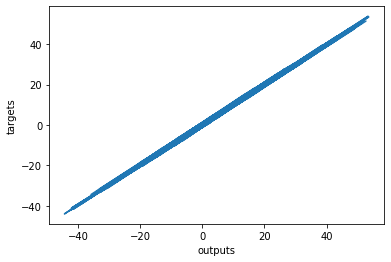

In [14]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

#plus ce tracé est proche d'une ligne de 45 dégrés, plus les résultats sont proches des objectifs

###### Dans la definition du modèle ci dessous, nous avons laissé les configuration par defaut de tensorflow faire le travail.

###### Mais nous definir une initialisation des weights et des biases pour avec Quasiment les même rRésultats que dans le notebook précédent

#### Set learning rate

learning_rate = 0.2

Le taux d'apprentissage fait partie intégrante de l'optimiseur.

Dans le modèle défini plus haut, nous avons pris le SGD par défaut. En effet, nous pouvons créer une variable pour un configuration personnalisée:
##### custer_optimizer =  tf.keras.optimizers.SGD(learning_rate = 0.02)

In [15]:
# fonction qui pose le modèle (couches de pile utilisées) et initialise les poids (ici kernel_initializer=weights)
#tf.keras.layers.dense(output_size, kernel_initializer, bias_initializer)

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size,
                                                 kernel_initializer=tf.random_uniform_initializer(minval=0.1, maxval=0.1),
                                                 bias_initializer=tf.random_uniform_initializer(minval=0.1, maxval=0.1))
    
                            ])

custer_optimizer =  tf.keras.optimizers.SGD(learning_rate = 0.02)
model.compile(optimizer=custer_optimizer, loss='mean_squared_error')
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Train on 1000 samples
Epoch 1/100
1000/1000 - 0s - loss: 23.8102
Epoch 2/100
1000/1000 - 0s - loss: 1.1301
Epoch 3/100
1000/1000 - 0s - loss: 0.4506
Epoch 4/100
1000/1000 - 0s - loss: 0.3765
Epoch 5/100
1000/1000 - 0s - loss: 0.3870
Epoch 6/100
1000/1000 - 0s - loss: 0.4073
Epoch 7/100
1000/1000 - 0s - loss: 0.3850
Epoch 8/100
1000/1000 - 0s - loss: 0.4124
Epoch 9/100
1000/1000 - 0s - loss: 0.3698
Epoch 10/100
1000/1000 - 0s - loss: 0.4068
Epoch 11/100
1000/1000 - 0s - loss: 0.3963
Epoch 12/100
1000/1000 - 0s - loss: 0.4048
Epoch 13/100
1000/1000 - 0s - loss: 0.3781
Epoch 14/100
1000/1000 - 0s - loss: 0.3805
Epoch 15/100
1000/1000 - 0s - loss: 0.3856
Epoch 16/100
1000/1000 - 0s - loss: 0.3882
Epoch 17/100
1000/1000 - 0s - loss: 0.4368
Epoch 18/100
1000/1000 - 0s - loss: 0.3893
Epoch 19/100
1000/1000 - 0s - loss: 0.3838
Epoch 20/100
1000/1000 - 0s - loss: 0.3750
Epoch 21/100
1000/1000 - 0s - loss: 0.3870
Epoch 22/100
1000/1000 - 0s - loss: 0.3740
Epoch 23/100
1000/1000 - 0s - loss: 0.39